<a href="https://colab.research.google.com/github/bartlomiejandruchow/AI/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMDb dataset

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
import numpy as np
import keras
from keras import layers

#print(train_data[0])
print(train_data.shape)
#train_labels[0]

max([max(sequence) for sequence in train_data])

word_index = imdb.get_word_index()
reverse_word_index = dict([(key,value) for (value, key) in word_index.items()])
decoded_review = " ".join(reverse_word_index.get(i-3,"?") for i in train_data[0])


def multi_hot_sequences(sequences, num_classes):
  results = np.zeros((len(sequences),num_classes))
  for i, sequence in enumerate(sequences):
    results[i][sequence] = 1.0
  return results

x_train = multi_hot_sequences(train_data, num_classes=10000)
x_test = multi_hot_sequences(test_data, num_classes=10000)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val)
)

results = model.evaluate(x_test, y_test)
print(results)


In [ ]:
import matplotlib.pyplot as plt

plt.clf

history_dict = history.history

acc = history_dict['loss']
val_acc = history_dict['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc,"r--")
plt.plot(epochs, val_acc,"b--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.xticks(epochs)
plt.show()




In [ ]:
# Housing Price
from keras.datasets import california_housing
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = california_housing.load_data(version = "small")



In [ ]:
def get_model():
  model = keras.Sequential(
      [
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
      ]
  )

  model.compile(optimizer = 'adam',
                loss = 'mean_squared_error',
                metrics = ['mean_absolute_error'],
                )
  return model
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

x_train = (train_data - mean) / std
x_test = (test_data - mean) / std

y_train = train_labels / 100000
y_test = test_labels / 100000




In [ ]:
# |-----|+++++|+++++|+++++|
# |+++++|-----|+++++|+++++|
# |+++++|+++++|-----|+++++|
# |+++++|+++++|+++++|-----|

# 0 : 0 , 120 :
# 1 : 120 , 240 :
# 2 : 240 , 360 :
# 3 : 360 , 480 :

k = 4
num_epochs = 200 #50
all_scores = []
all_mea_histories = []

num_val_samples = len(train_data) // k

for i in range(k):
  fold_x_val = x_train[i * num_val_samples : (i+1) * num_val_samples]
  fold_y_val = y_train[i * num_val_samples : (i+1) * num_val_samples]

  fold_x_train = np.concatenate([x_train[:i*num_val_samples], x_train[(i+1)*num_val_samples:]], axis=0,)
  fold_y_train = np.concatenate([y_train[:i*num_val_samples], y_train[(i+1)*num_val_samples:]], axis=0,)

  model = get_model()

  history = model.fit(
      fold_x_train,
      fold_y_train,
      validation_data = (fold_x_val, fold_y_val),
      epochs = num_epochs,
      batch_size = 16,
      verbose = 0
  )
  #scores = model.evaluate(fold_x_val, fold_y_val, verbose = 0)
  #val_loss, val_mae = scores
  #all_scores.append(val_mae)

  mea_history = history.history['val_mean_absolute_error']
  all_mea_histories.append(mea_history)

  #print(f" {i} : {i*num_val_samples} , {(i+1)*num_val_samples} :")



In [ ]:
print(all_mea_histories)

average_mae_history = [np.mean([x[i] for x in all_mea_histories]) for i in range(num_epochs)]
epochs = range(1, len(average_mae_history)+1)

plt.plot(epochs, average_mae_history)

In [4]:
from keras.datasets import mnist
import numpy as np

(train_data, train_labels), _ = mnist.load_data()

train_data = train_data.reshape((60000, 28*28))
train_data = train_data.astype("float32") / 255

train_images_baseline = np.copy(train_data)

train_images_with_noise_channels = np.concatenate(
    [train_data, np.random.random((len(train_data),784))],axis=1
    )
train_images_with_zeros_channels = np.concatenate(
    [train_data, np.zeros((len(train_data),784))],axis=1
)

In [6]:
import keras
from keras import layers

def get_model():
  model = keras.Sequential(
      [
          layers.Dense(512, activation="relu"),
          layers.Dense(10, activation="softmax"),
      ]
  )
  model.compile(
      optimizer = "adam",
      loss = "sparse_categorical_crossentropy",
      metrics = ["accuracy"]
  )
  return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels,
    train_labels,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2
)




Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.7787 - loss: 0.7108 - val_accuracy: 0.9182 - val_loss: 0.2784
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9253 - loss: 0.2526 - val_accuracy: 0.9263 - val_loss: 0.2436
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9503 - loss: 0.1666 - val_accuracy: 0.9501 - val_loss: 0.1701
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9661 - loss: 0.1155 - val_accuracy: 0.9491 - val_loss: 0.1700
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9773 - loss: 0.0785 - val_accuracy: 0.9558 - val_loss: 0.1468
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9844 - loss: 0.0573 - val_accuracy: 0.9558 - val_loss: 0.1431
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9892 - loss: 0.0401 - val_accuracy: 0.9548 - val_loss: 0.1527
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9936 - loss: 0.0273 - val_ac

In [ ]:
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels,
    train_labels,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2
)

In [7]:
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels,
    train_labels,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.8564 - loss: 0.5096 - val_accuracy: 0.9562 - val_loss: 0.1582
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9614 - loss: 0.1364 - val_accuracy: 0.9647 - val_loss: 0.1126
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9755 - loss: 0.0846 - val_accuracy: 0.9723 - val_loss: 0.0913
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9827 - loss: 0.0597 - val_accuracy: 0.9731 - val_loss: 0.0884
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9887 - loss: 0.0418 - val_accuracy: 0.9768 - val_loss: 0.0805
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9917 - loss: 0.0307 - val_accuracy: 0.9734 - val_loss: 0.0844
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9943 - loss: 0.0231 - val_accuracy: 0.9755 - val_loss: 0.0808
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9959 - loss: 0.0176 - val_acc

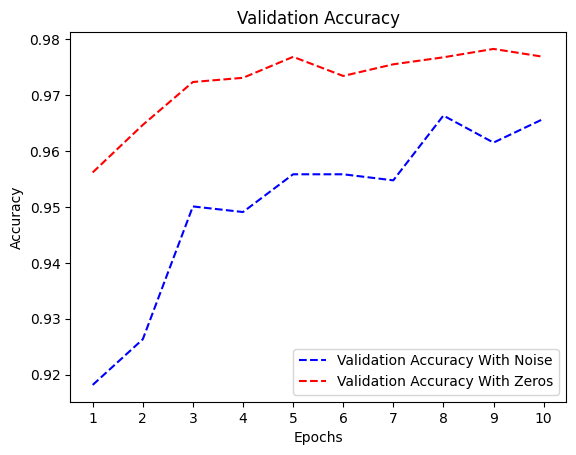

In [11]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
epochs = range(1, 11)
plt.plot(
    epochs,
    val_acc_noise,
    "b--",
    label = "Validation Accuracy With Noise",
)
plt.plot(
    epochs,
    val_acc_zeros,
    "r--",
    label = "Validation Accuracy With Zeros",
)
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()
